<a href="https://colab.research.google.com/github/saraMuay/face-liveness/blob/main/face_antispoofing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"

In [4]:
# unzio the file 
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

In [5]:
#cheack the contant of the folder
!ls final_antispoofing

test  train


In [6]:
#defin the direction of my data
dataset_dir = '/content/final_antispoofing'
train_dataset_dir = '/content/final_antispoofing/train'
test_dataset_dir = '/content/final_antispoofing/test'

In [7]:
# creat the safer path of all the file 
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [8]:
#creat new direction 
train_dir='/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

In [9]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
#copy  the dataset to new dataset
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [11]:
train_test_splits(data_directory=dataset_dir)


In [ ]:
# count number of origenal file in each folder
categories = ['real','spoof']
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


our data is balanced 

In [ ]:

def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [ ]:

training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/dfjsdfjk5.jpg', '/content/antispoofing_dataset/train/real/20201110_144919hr_flip.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal25brightness1.22.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_23_53_Prohr_flipbrightness0.67.jpg', '/content/antispoofing_dataset/train/real/Shikshya Gautam28hr_flip.jpg', '/content/antispoofing_dataset/train/real/hghgh34.jpg', '/content/antispoofing_dataset/train/real/hghgh48.jpg', '/content/antispoofing_dataset/train/real/Sunil Koirala43brightness0.74.jpg', '/content/antispoofing_dataset/train/real/None18.jpg', '/content/antispoofing_dataset/train/real/Sudeep Subedi23brightness0.55.jpg', '/content/antispoofing_dataset/train/real/WIN_20201119_10_49_36_Pro (2)hr_flip.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_10_08_27_Pro.jpg', '/content/antispoofing_dataset/train/real/None17.jpg', '/content/antispoofing_dataset/train/real/20201110_113317hr_flip.jpg', '/content/antispo

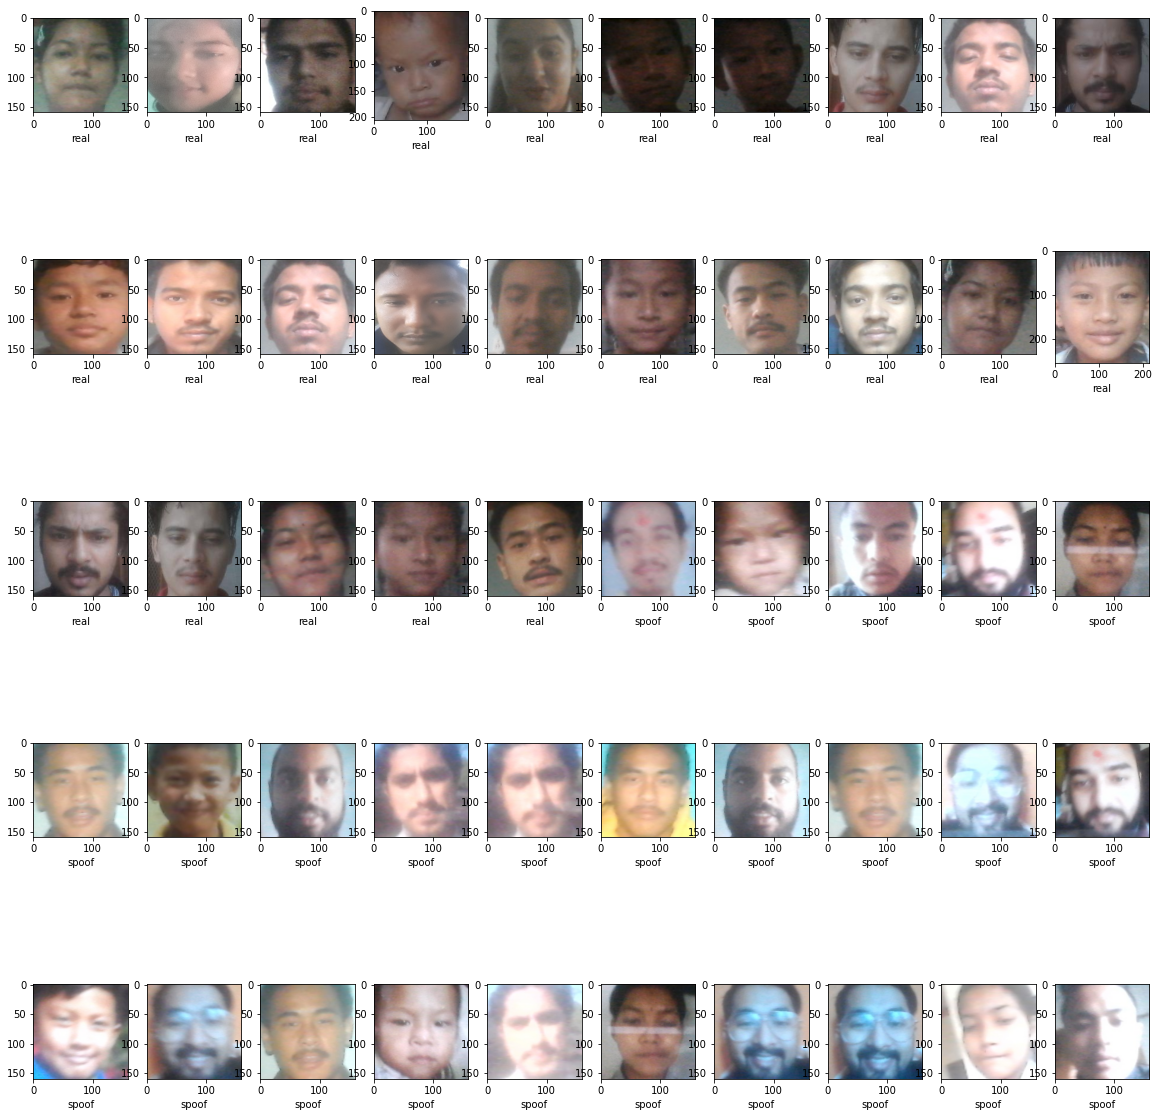

In [ ]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)


In [ ]:

testing_image_path = get_images( test_dir,25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/WIN_20201110_13_23_35_Pro (2).jpg', '/content/antispoofing_dataset/test/real/Sumit tamang15.jpg', '/content/antispoofing_dataset/test/real/ghjknhgj14.jpg', '/content/antispoofing_dataset/test/real/rftfyhbjnk39.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi35brightness0.59.jpg', '/content/antispoofing_dataset/test/real/Salina Xetri35.jpg', '/content/antispoofing_dataset/test/real/hehehe2.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam33hr_flip.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam38.jpg', '/content/antispoofing_dataset/test/real/WIN_20201119_10_49_30_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/received_663513861195964hr_flip.jpg', '/content/antispoofing_dataset/test/real/kjdfjsdkfj49.jpg', '/content/antispoofing_dataset/test/real/received_415811819573878hr_flip.jpg', '/content/antispoofing_dataset/test/real/Rihan Ale45.jpg', '/content/antispoofing_dataset/test/real/Sumit tamang3

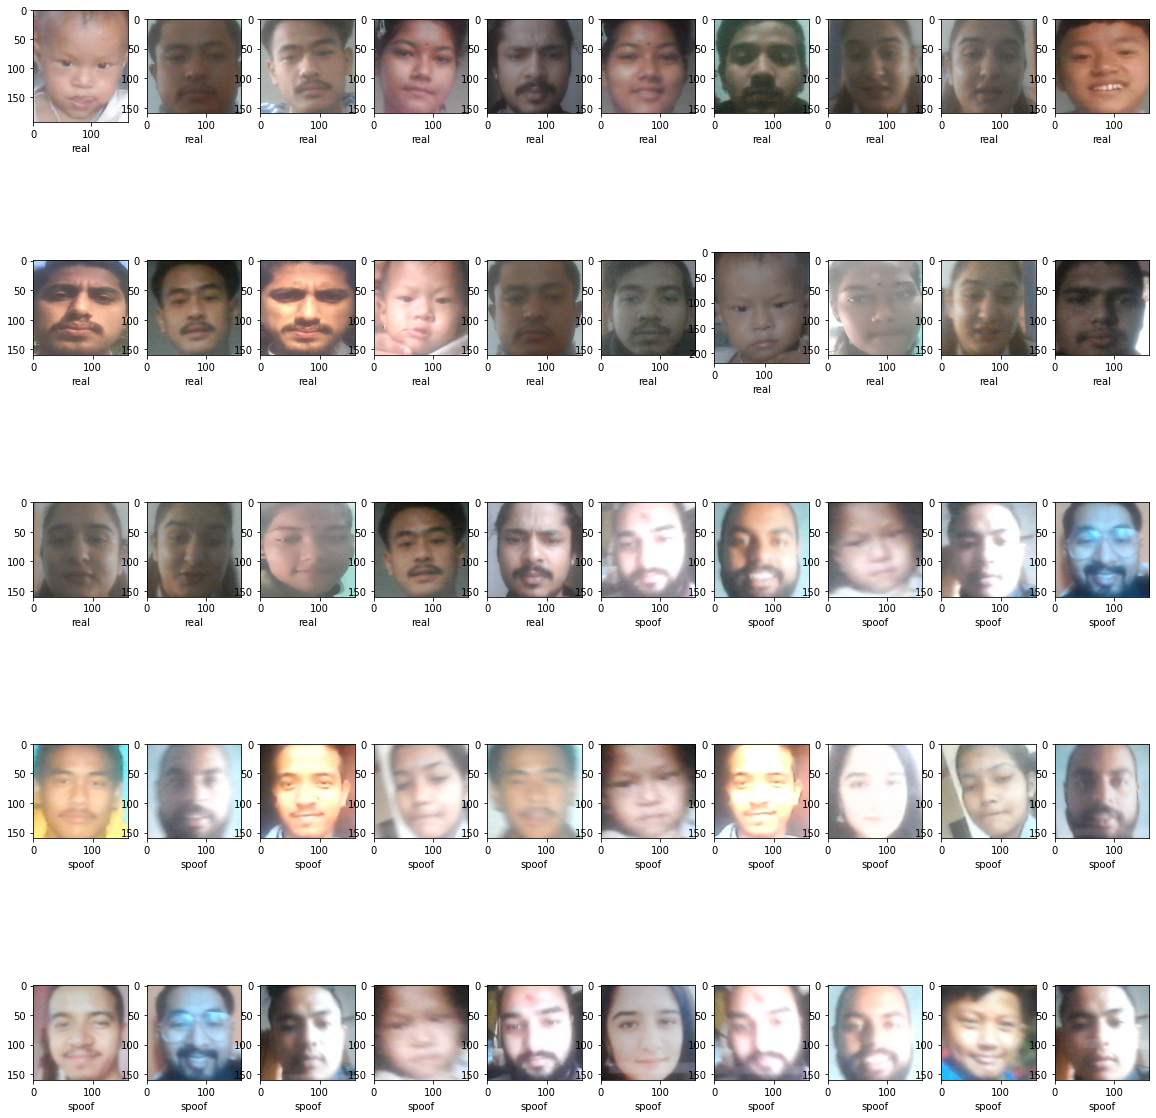

In [ ]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)


In [ ]:

from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

In [ ]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest',
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(160,160),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=25,
                                                    shuffle=True)

Found 4220 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(test_dir,
                                                    target_size=(160,160),
                                                    color_mode='rgb',
                                                    class_mode='binary',
                                                    batch_size=25)

Found 951 images belonging to 2 classes.


In [ ]:
mobilenet = MobileNetV2(weights="imagenet",
                        include_top=False,
                        input_tensor=Input(shape=(160,160,3)))

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:

# tell the model what cost and optimization method to use
model.compile(loss='binary_crossentropy',
              optimizer = Adam(learning_rate=0.000001,
                               beta_1=0.9,
                               beta_2=0.999,
                               epsilon=1e-07),
              metrics=['accuracy'])

In [ ]:

os.mkdir('/content/model_weights/')


In [ ]:
# saving the model 
model_checkpoint = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5',
                                   monitor='val_loss',
                                   mode='min',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True)

In [ ]:

history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // 25,
                              validation_steps = valid_generator.samples // 25,
                              epochs = 100,
                              callbacks=[model_checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
168/168 [==============================] - 94s 539ms/step - loss: 0.9737 - accuracy: 0.4958 - val_loss: 0.7142 - val_accuracy: 0.5516

Epoch 00001: val_loss improved from inf to 0.71423, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.551579.h5
Epoch 2/100
168/168 [==============================] - 92s 546ms/step - loss: 0.7831 - accuracy: 0.4927 - val_loss: 0.6710 - val_accuracy: 0.5747

Epoch 00002: val_loss improved from 0.71423 to 0.67095, saving model to ./model_weights/finalyearproject_antispoofing_model_02-0.574737.h5
Epoch 3/100
168/168 [==============================] - 92s 546ms/step - loss: 0.7131 - accuracy: 0.5430 - val_loss: 0.6541 - val_accuracy: 0.6253

Epoch 00003: val_loss improved from 0.67095 to 0.65408, saving model to ./model_weights/finalyearproject_antispoofing_model_03-0.625263.h5
Epoch 4/100
168/168 [==============================] - 92s 548ms/step - loss: 0.6816 - accuracy: 0.5795 - val_loss: 0.6394 - val_accuracy: 0.6453


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


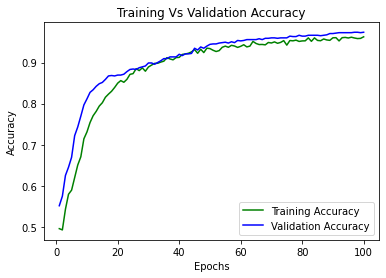

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

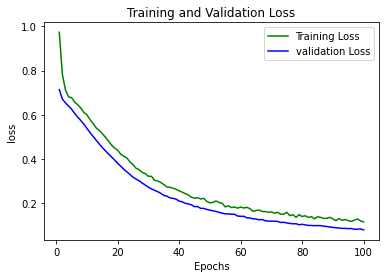

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:

from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

{'real': 18, 'spoof': 456}

In [ ]:
check_fakes(test_dir,categories[0])

{'real': 470, 'spoof': 7}

In [ ]:
(18+7)/(18+456+470+7)*100

2.6288117770767614

In [ ]:
a=100-2.6288
print ( "Accurcy",np.around(a)) 


Accurcy 97.0
